<a href="https://colab.research.google.com/github/okky-chan/telecommunication-churn-prediction-model/blob/main/EDA_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing
pd.set_option('display.max_columns', None)

import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization 

#Read the dataset
data_df = pd.read_csv("data.csv")

#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    
dataoveriew(data_df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  7043

Number of features: 21

Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [2]:
target_instance = data_df["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

In [3]:
#Defining bar chart function
def bar(feature, df=data_df ):
    #Group by the categorical feature
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '  #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str


    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)
    
    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )
     
    return fig.show()

In [4]:
#Gender feature plot
bar('gender')
#SeniorCitizen feature plot 
data_df.loc[data_df.SeniorCitizen==0,'SeniorCitizen'] = "No"   #convert 0 to No in all data instances
data_df.loc[data_df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"  #convert 1 to Yes in all data instances
bar('SeniorCitizen')
#Partner feature plot
bar('Partner')
#Dependents feature plot
bar('Dependents')
#PhoneService feature plot
bar('PhoneService')
#MultipleLines feature plot
bar('MultipleLines')
#InternetService feature plot
bar('InternetService')
#OnlineSecurity feature plot
bar('OnlineSecurity')
#OnlineBackup feature plot
bar('OnlineBackup')
#DeviceProtection feature plot
bar('DeviceProtection')
#TechSupport feature plot
bar('TechSupport')
#StreamingTV feature plot
bar('StreamingTV')
#StreamingMovies feature plot
bar('StreamingMovies')

In [5]:
#Contract feature plot
bar('Contract')
#PaperlessBilling feature plot
bar('PaperlessBilling')
#PaymentMethod feature plot
bar('PaymentMethod')

In [6]:
data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'],errors='coerce')
#Fill the missing values with with the median value
data_df['TotalCharges'] = data_df['TotalCharges'].fillna(data_df['TotalCharges'].median())

In [7]:
def hist(feature):
    group_df = data_df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

In [8]:
hist('tenure')
hist('MonthlyCharges')
hist('TotalCharges')

In [9]:
#Create an empty dataframe
bin_df = pd.DataFrame()

#Update the binning dataframe
bin_df['tenure_bins'] =  pd.qcut(data_df['tenure'], q=3, labels= ['low', 'medium', 'high'])
bin_df['MonthlyCharges_bins'] =  pd.qcut(data_df['MonthlyCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['TotalCharges_bins'] =  pd.qcut(data_df['TotalCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['Churn'] = data_df['Churn']

#Plot the bar chart of the binned variables
bar('tenure_bins', bin_df)
bar('MonthlyCharges_bins', bin_df)
bar('TotalCharges_bins', bin_df)

In [10]:
data_df.drop(["customerID"],axis=1,inplace = True)

#Encode categorical features

#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

#Encoding target feature
data_df['Churn'] = data_df[['Churn']].apply(binary_map)

#Encoding gender category
data_df['gender'] = data_df['gender'].map({'Male':1, 'Female':0})

#Encoding other binary category
binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
data_df[binary_list] = data_df[binary_list].apply(binary_map)

#Encoding the other categoric features with more than two categories
data_df = pd.get_dummies(data_df, drop_first=True)

In [11]:
#Checking the correlation between features
corr = data_df.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name separators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in data_df.columns]

#Effect the change to the dataframe column names
data_df.columns = all_columns

#Prepare it for the Generalized Linear Model formula
glm_columns = [e for e in all_columns if e not in ['customerID', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=data_df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7019
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2914.7
Date:                Wed, 17 Nov 2021   Deviance:                       5829.3
Time:                        13:59:10   Pearson chi2:                 8.04e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [13]:
np.exp(res.params)

Intercept                                2.287343
gender                                   0.978355
SeniorCitizen                            1.239957
Partner                                  0.997312
Dependents                               0.857471
tenure                                   0.942322
PhoneService                             1.654668
PaperlessBilling                         1.407543
MonthlyCharges                           0.960432
TotalCharges                             1.000318
MultipleLines_No_phone_service           1.382358
MultipleLines_Yes                        1.563475
InternetService_Fiber_optic              5.771657
InternetService_No                       0.774257
OnlineSecurity_No_internet_service       0.774257
OnlineSecurity_Yes                       0.814269
OnlineBackup_No_internet_service         0.774257
OnlineBackup_Yes                         1.026127
DeviceProtection_No_internet_service     0.774257
DeviceProtection_Yes                     1.159152


In [14]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

data_df['tenure'] = sc.fit_transform(data_df[['tenure']])
data_df['MonthlyCharges'] = sc.fit_transform(data_df[['MonthlyCharges']])
data_df['TotalCharges'] = sc.fit_transform(data_df[['TotalCharges']])

In [15]:
#Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split data into train and test sets
from sklearn.model_selection import train_test_split
X = data_df.drop('Churn', axis=1)
y = data_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [16]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4930 samples.
Testing set has 2113 samples.


In [17]:
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

In [18]:
def apply_classifier(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    conf_mtx = confusion_matrix(y_test, predict)
    f, axes = plt.subplots(ncols=2, figsize=(8,4))
    sns.heatmap(conf_mtx, annot = True, cmap = 'tab20c', cbar = False, fmt = 'g', ax = axes[0])
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')
    axes[0].set_title('Confusion Matrix')
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn'])
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn'])
    
    
    roc_auc = roc_auc_score(y_test, predict)
    print("Area under ROC Curve: ",roc_auc,"\n")
    
    fpr, tpr,_ = roc_curve(y_test, predict)
    axes[1].plot(fpr, tpr, label = "auc = "+str(roc_auc));
    axes[1].plot([0,1], [0,1], color = 'navy', lw = 1, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = "lower right")
    return clf

Area under ROC Curve:  0.727096823323626 



LogisticRegression()

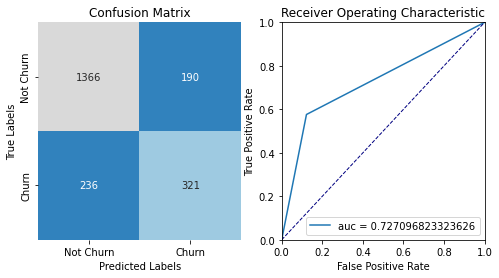

In [19]:
log_model = LogisticRegression()
apply_classifier(log_model, X_train, X_test, y_train, y_test)

In [20]:
#Running Logistic Regression as baseline model
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.7983909133932797
precision:  0.6281800391389433
recall:  0.5763016157989228
f1_score:  0.7955174819104321


Area under ROC Curve:  0.7090315821537525 



SVC()

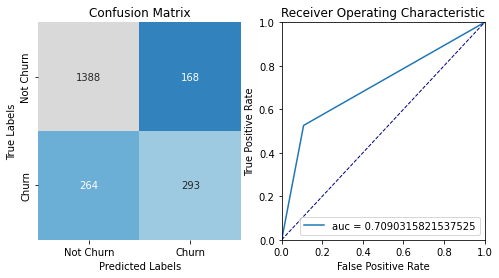

In [21]:
svc_model = SVC()
apply_classifier(svc_model, X_train, X_test, y_train, y_test)

In [22]:
#Running Support Vector Classifier as baseline model
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.795551348793185
precision:  0.6355748373101953
recall:  0.526032315978456
f1_score:  0.7889704158679894


Area under ROC Curve:  0.7059509029736054 



RandomForestClassifier()

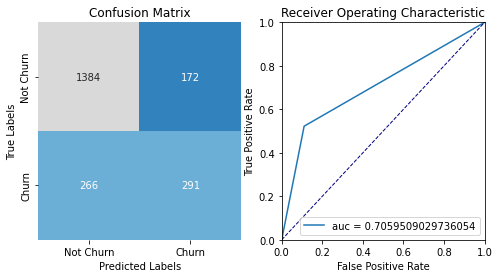

In [23]:
rf_model = RandomForestClassifier()
apply_classifier(rf_model, X_train, X_test, y_train, y_test)

In [24]:
#Running Random Forest Classifier as baseline model
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.7898722195929957
precision:  0.6247240618101545
recall:  0.5080789946140036
f1_score:  0.782451348100813


Area under ROC Curve:  0.6512780780254116 



DecisionTreeClassifier()

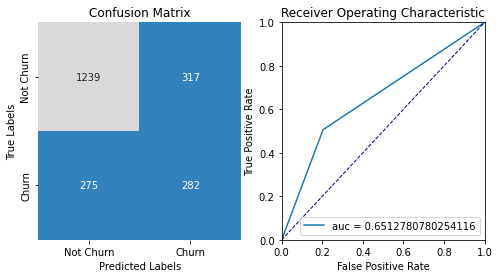

In [25]:
dt_model = DecisionTreeClassifier()
apply_classifier(dt_model, X_train, X_test, y_train, y_test)

In [26]:
#Running Decision Tree as baseline model
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.7269285376242309
precision:  0.4828767123287671
recall:  0.5062836624775583
f1_score:  0.728964480237222


Area under ROC Curve:  0.7257030179117842 



GaussianNB()

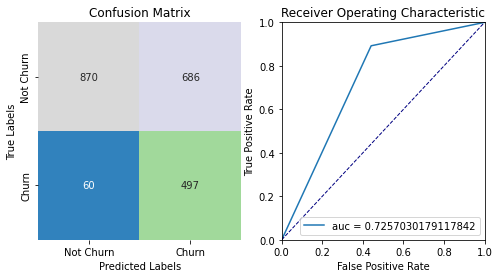

In [27]:
nb_model = GaussianNB()
apply_classifier(nb_model, X_train, X_test, y_train, y_test)

In [28]:
#Running Naive Bayes as baseline model
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.6469474680548982
precision:  0.42011834319526625
recall:  0.8922800718132855
f1_score:  0.6660052398768987


In [29]:
#Feature selection to improve model building
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression() # Logistic Regression
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X.values, y.values)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.



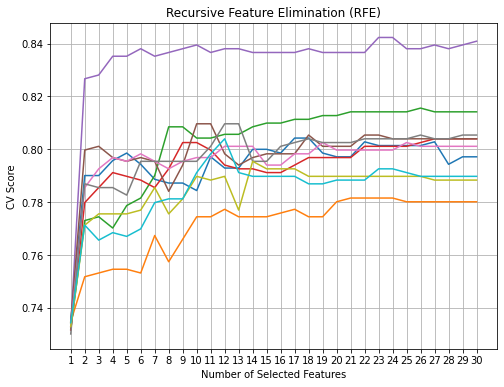

The optimal number of features: 23


In [30]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [31]:
#Saving dataframe with optimal features
X_rfe = X.iloc[:, rfecv.support_]

#Overview of the optimal features in comparison with the intial dataframe
print("\"X\" dimension: {}".format(X.shape))
print("\"X\" column list:", X.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (7043, 30)
"X" column list: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_No', 'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service', 'OnlineBackup_Yes', 'DeviceProtection_No_internet_service', 'DeviceProtection_Yes', 'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes', 'StreamingMovies_No_internet_service', 'StreamingMovies_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaymentMethod_Credit_card__automatic_', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']
"X_rfe" dimension: (7043, 23)
"X_rfe" column list: ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', '

In [32]:
#Splitting data with optimal features
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=50)

Area under ROC Curve:  0.7287698513428068 



LogisticRegression()

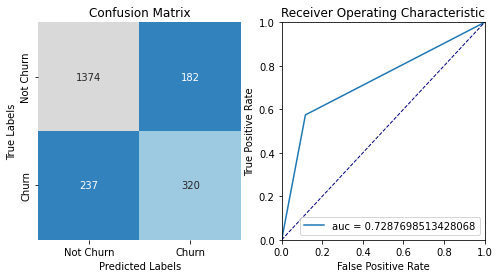

In [33]:
log_model = LogisticRegression()
apply_classifier(log_model, X_train, X_test, y_train, y_test)

In [34]:
#Running Logistic Regression model
log_model = modeling(LogisticRegression, 'Logistic Regression Classification')

Logistic Regression Classification
accuracy:  0.8017037387600567
precision:  0.6374501992031872
recall:  0.5745062836624776
f1_score:  0.7982762676502377


Area under ROC Curve:  0.7092969590119673 



SVC()

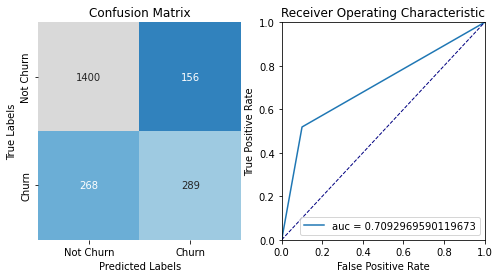

In [35]:
svc_model = SVC()
apply_classifier(svc_model, X_train, X_test, y_train, y_test)

In [36]:
#Running Support Vector Classifier model
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.7993374349266446
precision:  0.6494382022471911
recall:  0.518850987432675
f1_score:  0.7916082146150322


Area under ROC Curve:  0.6991468710914605 



RandomForestClassifier()

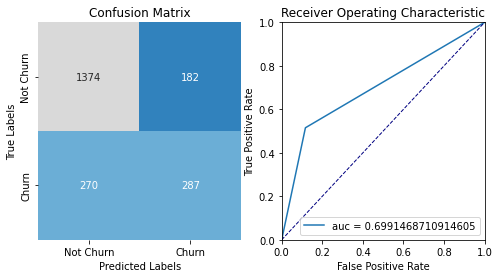

In [39]:
rf_model = RandomForestClassifier()
apply_classifier(rf_model, X_train, X_test, y_train, y_test)

In [38]:
#Running Random Forest Classifier model
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.7851396119261713
precision:  0.6070686070686071
recall:  0.5242369838420108
f1_score:  0.7798348884975046


Area under ROC Curve:  0.6553891117028887 



DecisionTreeClassifier()

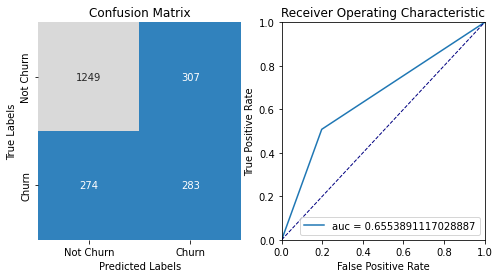

In [40]:
dt_model = DecisionTreeClassifier()
apply_classifier(dt_model, X_train, X_test, y_train, y_test)

In [41]:
#Running Decision Tree model
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.7292948414576431
precision:  0.4873524451939292
recall:  0.518850987432675
f1_score:  0.731947865270711


Area under ROC Curve:  0.7316757279402603 



GaussianNB()

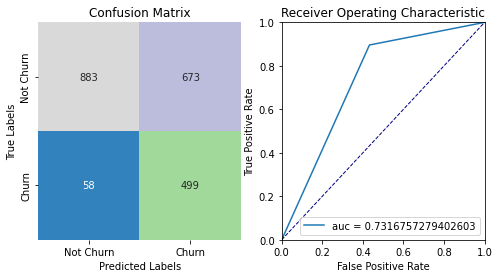

In [42]:
nb_model = GaussianNB()
apply_classifier(nb_model, X_train, X_test, y_train, y_test)

In [43]:
#Running Naive Bayes model
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.6540463795551349
precision:  0.4257679180887372
recall:  0.895870736086176
f1_score:  0.6729702812977834


In [44]:
## Improve best model by hyperparameter tuning
#Define model
model = LogisticRegression()

#Define evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 1000)

#Define search
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

#Execute search
result = search.fit(X_rfe, y)
print('- Summary of Result -')
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
params = result.best_params_

#Improving the Logistic Regression model
log_model = modeling(LogisticRegression, 'Logistic Regression Classification', params=params)

- Summary of Result -
Best Score: 0.8045796394799054
Best Hyperparameters: {'C': 105.95953102146511, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Classification
accuracy:  0.8031235210601041
precision:  0.6407185628742516
recall:  0.5763016157989228
f1_score:  0.7996532493520713


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


7080 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1590 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError

In [45]:
#Saving best model 
import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(log_model, filename)

['model.sav']